In [1]:
import time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('eda_polarity.csv',index_col = False)
df=df.dropna()
df.head()

,Data,Polarity
0,balenciaga and the rise of trash by umair haque,0
1,removed the balenciaga scandal broke,0
2,omega aqua terra i really wanted an explorer p...,0
3,they seem to have a life of their own crazy di...,0
4,since i dont twitter and shoe only put up a mi...,0


In [3]:
tt_df_eda = pd.read_csv('twitter_df_eda(with_prediction).csv', index_col=False,lineterminator='\n')
tt_df_eda = tt_df_eda.dropna()
tt_df_eda = tt_df_eda.drop(columns=['Unnamed: 0'])
tt_df_eda

,User,Date Created,Number of Likes,Number of Retweets,Source of Tweet,Tweet,Language,URL,Cleaned Data,Tokenized Data,Tokenized LowerCase Data,Tokenized Clean Data,Tokenized Clean LowerCase Data,Relevance
0,RivalTimes,2022-11-01 23:52:17+00:00,0,0,Jetpack.com,Why is it not enough that Ralph Lauren has wit...,en,https://twitter.com/RivalTimes/status/15875934...,Why not enough Ralph Lauren withdrawn sacks co...,"['Why', 'is', 'it', 'not', 'enough', 'that', '...","['why', 'is', 'it', 'not', 'enough', 'that', '...","['Why', 'not', 'enough', 'Ralph', 'Lauren', 'w...","['why', 'not', 'enough', 'ralph', 'lauren', 'w...",1
1,FortniteBoards,2022-11-01 23:42:09+00:00,0,0,FortniteBoards Social Auto Post,Fortnites Polo Ralph Lauren Crossover Brings ...,en,https://twitter.com/FortniteBoards/status/1587...,Fortnites Polo Ralph Lauren Crossover Brings R...,"['Fortnites', 'Polo', 'Ralph', 'Lauren', 'Cros...","['fortnites', 'polo', 'ralph', 'lauren', 'cros...","['Fortnites', 'Polo', 'Ralph', 'Lauren', 'Cros...","['fortnites', 'polo', 'ralph', 'lauren', 'cros...",1
2,GeyiPoji,2022-11-01 23:41:08+00:00,0,0,Jetpack.com,The Fortnite Crossover Ralph Lauren Polo Bring...,en,https://twitter.com/GeyiPoji/status/1587590596...,The Fortnite Crossover Ralph Lauren Polo Bring...,"['The', 'Fortnite', 'Crossover', 'Ralph', 'Lau...","['the', 'fortnite', 'crossover', 'ralph', 'lau...","['The', 'Fortnite', 'Crossover', 'Ralph', 'Lau...","['the', 'fortnite', 'crossover', 'ralph', 'lau...",1
3,modcontrollerz,2022-11-01 23:39:48+00:00,0,0,Jetpack.com,Fortnites Polo Ralph Lauren Crossover Brings R...,en,https://twitter.com/modcontrollerz/status/1587...,Fortnites Polo Ralph Lauren Crossover Brings R...,"['Fortnites', 'Polo', 'Ralph', 'Lauren', 'Cros...","['fortnites', 'polo', 'ralph', 'lauren', 'cros...","['Fortnites', 'Polo', 'Ralph', 'Lauren', 'Cros...","['fortnites', 'polo', 'ralph', 'lauren', 'cros...",1
4,fuzzcassette,2022-11-01 23:39:16+00:00,6,0,Twitter for iPhone,need the fortnite ralph lauren polo,en,https://twitter.com/fuzzcassette/status/158759...,need fortnite ralph lauren polo,"['need', 'the', 'fortnite', 'ralph', 'lauren',...","['need', 'the', 'fortnite', 'ralph', 'lauren',...","['need', 'fortnite', 'ralph', 'lauren', 'polo']","['need', 'fortnite', 'ralph', 'lauren', 'polo']",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,brightwintology,2023-02-28 23:22:22+00:00,3,2,Twitter for iPhone,TiffanyxWin TiffanyAndCo winmetawinpleaseeeeeee,en,https://twitter.com/brightwintology/status/163...,TiffanyxWin TiffanyAndCo winmetawinpleaseeeeeee,"['TiffanyxWin', 'TiffanyAndCo', 'winmetawinple...","['tiffanyxwin', 'tiffanyandco', 'winmetawinple...","['TiffanyxWin', 'TiffanyAndCo', 'winmetawinple...","['tiffanyxwin', 'tiffanyandco', 'winmetawinple...",1
9701,nebulawin,2023-02-28 23:21:07+00:00,11,10,Twitter for iPhone,this is so slayageTiffanyxWin winmetawin winme...,en,https://twitter.com/nebulawin/status/163070971...,slayageTiffanyxWin winmetawin winmetawin Tiffa...,"['this', 'is', 'so', 'slayageTiffanyxWin', 'wi...","['this', 'is', 'so', 'slayagetiffanyxwin', 'wi...","['slayageTiffanyxWin', 'winmetawin', 'winmetaw...","['slayagetiffanyxwin', 'winmetawin', 'winmetaw...",0
9702,WINNIEBETADINE,2023-02-28 23:17:37+00:00,3,2,Twitter for Android,Baby Bunny Win Metawin TiffanyxWin TiffanyAndC...,en,https://twitter.com/WINNIEBETADINE/status/1630...,Baby Bunny Win Metawin TiffanyxWin TiffanyAndC...,"['Baby', 'Bunny', 'Win', 'Metawin', 'TiffanyxW...","['baby', 'bunny', 'win', 'metawin', 'tiffanyxw...","['Baby', 'Bunny', 'Win', 'Metawin', 'TiffanyxW...","['baby', 'bunny', 'win', 'metawin', 'tiffanyxw...",1
9703,WINNIEBETADINE,2023-02-28 23:15:53+00:00,0,3,Twitter for Android,He is so UNREAL Win Metawin TiffanyxWin Tiffan...,en,https://twitter.com/WINNIEBETADINE/status/1630...,He UNREAL Win Metawin TiffanyxWin TiffanyAndCo...,"['He', 'is', 'so', 'UNREAL', 'Win', 'Metawin',...","['he', 'is', 'so', 'unreal', 'win', 'metawin',...","['He', 'UNREAL', 'Win', 'Meta

## Stacked Ensemble

In [4]:
# Split the Dataset into random Train and Test
X_train = df['Data']
X_test = tt_df_eda['Cleaned Data']
y_train = df['Polarity']


# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape)

Train Set : (15378,) (15378,)
Test Set  : (9705,)


In [5]:
# Split the Dataset into random Train and Test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.50, random_state = 42)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Val Set  :", X_val.shape, y_val.shape)
X_train

Train Set : (7689,) (7689,)
Val Set  : (7689,) (7689,)


8262     check out this listing i just added to my clos...
6784          authentic cristobal balenciaga knitwear ebay
7782                             cristobal balenciaga gmgm
2480     i neer wanted to take the vaccine but felt obl...
12787    daman magazine christian dior bts twt wtffff o...
                               ...                        
5191                        grannie louis vuitton spring x
13418    best of the day on the rumors are going crazy ...
5390     this picture was also by louis vuitton on twit...
860      malcolmrenoldz clownworld why do you think was...
7270     nan qchaul kg burberry louis vuitton dior ston...
Name: Data, Length: 7689, dtype: object

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range = (1, 3), binary = True, smooth_idf = False)

X_train = tf_idf.fit_transform(X_train)
X_val=tf_idf.transform(X_val)
X_test = tf_idf.transform(X_test)

In [7]:
#importing the packages

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Best alpha:  1.0


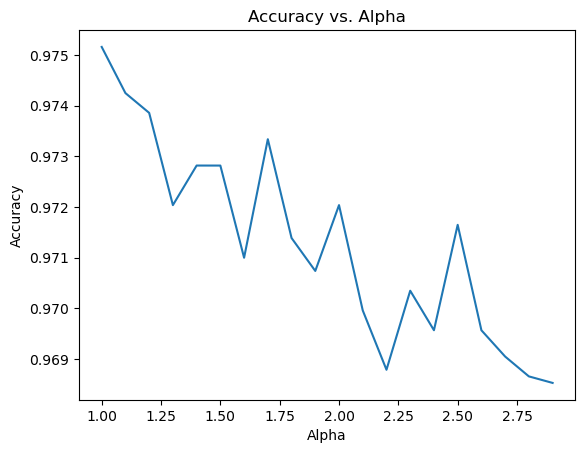

In [8]:
def get_accuracy_CV(model):

    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle = True)

    # Get Accuracy scores
    accuracy = cross_val_score(model, X_train, y_train, scoring = "accuracy", cv = kf)

    return accuracy.mean()

res = pd.Series([get_accuracy_CV(MultinomialNB(alpha = i)) for i in np.arange(1, 3, 0.1)], index = np.arange(1, 3, 0.1))

best_alpha = np.round(res.idxmax(), 2)
print('Best alpha: ', best_alpha)

plt.plot(res)
plt.title('Accuracy vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()

In [9]:
#specifying the initial learners
model1 = MultinomialNB(alpha = 1.0)
model2 = LogisticRegression(random_state=42,max_iter=1000)
model3 = SVC(kernel = 'rbf', random_state = 42)

In [10]:
#training the initial learners
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

SVC(random_state=42)

In [11]:
#making predictions for the validation data
preds1 = model1.predict(X_val)
preds2 = model2.predict(X_val)
preds3 = model3.predict(X_val)

#making predictions for the test data
test_preds1 = model1.predict(X_test)
test_preds2 = model2.predict(X_test)
test_preds3 = model3.predict(X_test)


In [12]:
#making a new dataset for training our final model by stacking the predictions on the validation data
train_stack = np.column_stack((preds1,preds2,preds3))

#making the final test set for our final model by stacking the predictions on the test data
test_stack = np.column_stack((test_preds1,test_preds2,test_preds3))

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
final_model = RandomForestClassifier()

#training the final model on the stacked predictions
final_model.fit(train_stack,y_val)

RandomForestClassifier()

In [15]:
st=time.time()
final_predictions = final_model.predict(test_stack)
et=time.time()
elapsed_time=et-st
print("Time taken for prediction: ", elapsed_time,"s")

Time taken for prediction:  0.07917952537536621 s


In [16]:
tt_df_eda['Polarity'] = final_predictions

In [17]:
tt_df_eda.head()

,User,Date Created,Number of Likes,Number of Retweets,Source of Tweet,Tweet,Language,URL,Cleaned Data,Tokenized Data,Tokenized LowerCase Data,Tokenized Clean Data,Tokenized Clean LowerCase Data,Relevance,Polarity
0,RivalTimes,2022-11-01 23:52:17+00:00,0,0,Jetpack.com,Why is it not enough that Ralph Lauren has wit...,en,https://twitter.com/RivalTimes/status/15875934...,Why not enough Ralph Lauren withdrawn sacks co...,"['Why', 'is', 'it', 'not', 'enough', 'that', '...","['why', 'is', 'it', 'not', 'enough', 'that', '...","['Why', 'not', 'enough', 'Ralph', 'Lauren', 'w...","['why', 'not', 'enough', 'ralph', 'lauren', 'w...",1,2
1,FortniteBoards,2022-11-01 23:42:09+00:00,0,0,FortniteBoards Social Auto Post,Fortnites Polo Ralph Lauren Crossover Brings ...,en,https://twitter.com/FortniteBoards/status/1587...,Fortnites Polo Ralph Lauren Crossover Brings R...,"['Fortnites', 'Polo', 'Ralph', 'Lauren', 'Cros...","['fortnites', 'polo', 'ralph', 'lauren', 'cros...","['Fortnites', 'Polo', 'Ralph', 'Lauren', 'Cros...","['fortnites', 'polo', 'ralph', 'lauren', 'cros...",1,2
2,GeyiPoji,2022-11-01 23:41:08+00:00,0,0,Jetpack.com,The Fortnite Crossover Ralph Lauren Polo Bring...,en,https://twitter.com/GeyiPoji/status/1587590596...,The Fortnite Crossover Ralph Lauren Polo Bring...,"['The', 'Fortnite', 'Crossover', 'Ralph', 'Lau...","['the', 'fortnite', 'crossover', 'ralph', 'lau...","['The', 'Fortnite', 'Crossover', 'Ralph', 'Lau...","['the', 'fortnite', 'crossover', 'ralph', 'lau...",1,4
3,modcontrollerz,2022-11-01 23:39:48+00:00,0,0,Jetpack.com,Fortnites Polo Ralph Lauren Crossover Brings R...,en,https://twitter.com/modcontrollerz/status/1587...,Fortnites Polo Ralph Lauren Crossover Brings R...,"['Fortnites', 'Polo', 'Ralph', 'Lauren', 'Cros...","['fortnites', 'polo', 'ralph', 'lauren', 'cros...","['Fortnites', 'Polo', 'Ralph', 'Lauren', 'Cros...","['fortnites', 'polo', 'ralph', 'lauren', 'cros...",1,2
4,fuzzcassette,2022-11-01 23:39:16+00:00,6,0,Twitter for iPhone,need the fortnite ralph lauren polo,en,https://twitter.com/fuzzcassette/status/158759...,need fortnite ralph lauren polo,"['need', 'the', 'fortnite', 'ralph', 'lauren',...","['need', 'the', 'fortnite', 'ralph', 'lauren',...","['need', 'fortnite', 'ralph', 'lauren', 'polo']","['need', 'fortnite', 'ralph', 'lauren', 'polo']",1,4


In [18]:
tt_df_eda.to_csv("Polarity_twitter_stacked2.csv", encoding="utf-8", index=False)